## Titanic data from kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
sns.set_style('whitegrid')
%matplotlib inline

## Get the Data
**Read in the titanic_df.csv file and set it to a data frame called ad_data.**

In [3]:
titanic_df=pd.read_csv('titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df[~titanic_df['Cabin'].isnull()]['Survived'].value_counts()
# titanic_df['Ticket'][0].split(" ")[0]

1    136
0     68
Name: Survived, dtype: int64

In [6]:
titanic_df[titanic_df['Cabin']=='B96 B98' ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


**Check the head of ad_data**

In [7]:
titanic_df.shape

(891, 12)

** Use info and describe() on ad_data**

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

Let's use seaborn to explore the data!



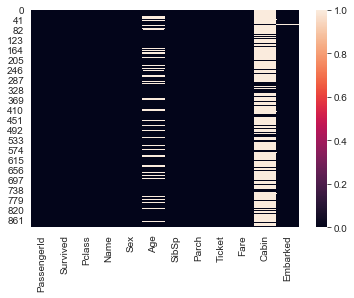

In [10]:
sns.heatmap(titanic_df.isnull())
#no null values present

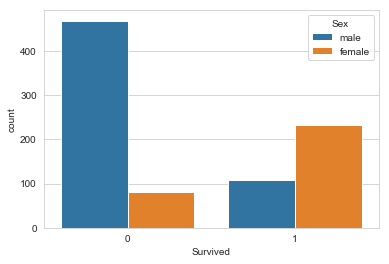

In [11]:
sns.countplot(x='Survived', data=titanic_df, hue='Sex')
#more female have survived compared tomale

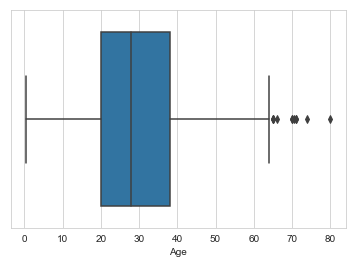

In [12]:
sns.boxplot(x='Age',data=titanic_df, hue='Sex')

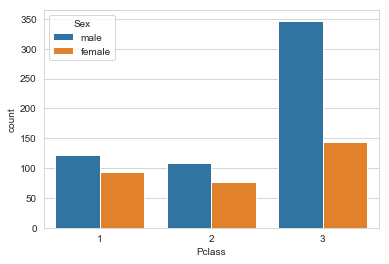

In [13]:
sns.countplot(x='Pclass', data=titanic_df,hue='Sex')

C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


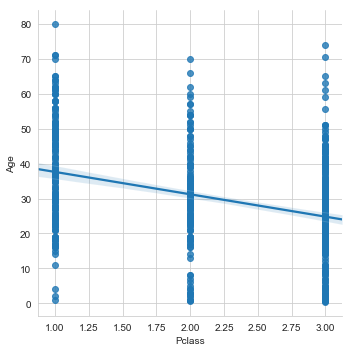

In [14]:
# sns.boxplot(y='Age', x='Pclass',data=titanic_df)
sns.lmplot(y='Age', x='Pclass',data=titanic_df)

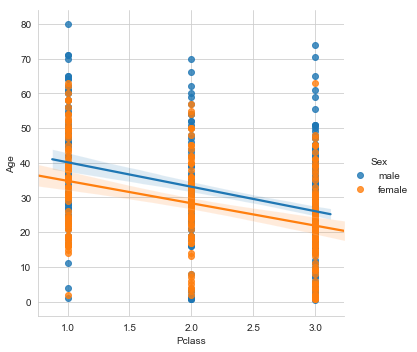

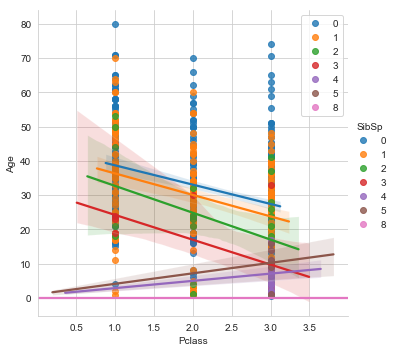

In [15]:
sns.lmplot(y='Age', x='Pclass',data=titanic_df,hue='Sex')
sns.lmplot(y='Age', x='Pclass',data=titanic_df,hue='SibSp')
plt.legend(bbox_to_anchor=(1,1))

In [16]:
def impute_age(col):
    
    if np.isnan(col[2]):
        if col[0]==1:
            if col[1]=='male':
                return 40
            else:
                return 36
        elif col[1]==2:
            if col[1]=='male':
                return 35
            else:
                return 28
        else:
            if col[1]=='male':
                return 27
            else:
                return 23
    else:
        return col[2]




In [17]:
titanic_df['Age']=titanic_df[['Pclass', 'Sex','Age']].apply(impute_age, axis=1)
#imputing age based on the analysis

In [18]:
titanic_df.drop(['Cabin'],axis=1, inplace=True)

In [19]:
print(titanic_df['Embarked'].isnull().sum())
print(titanic_df['Embarked'].value_counts())

2
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [20]:
titanic_df['Embarked'].fillna('S', inplace=True)

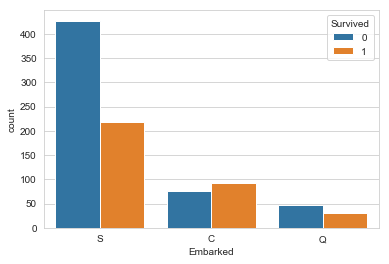

In [21]:
sns.countplot(x='Embarked', data=titanic_df, hue='Survived')
# sns.countplot(x='Embarked', data=titanic_df, hue='Sex')

** Finally, create a pairplot with the hue defined by the 'Survived' column feature.**

In [22]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']
titanic_df=titanic_df[features]
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


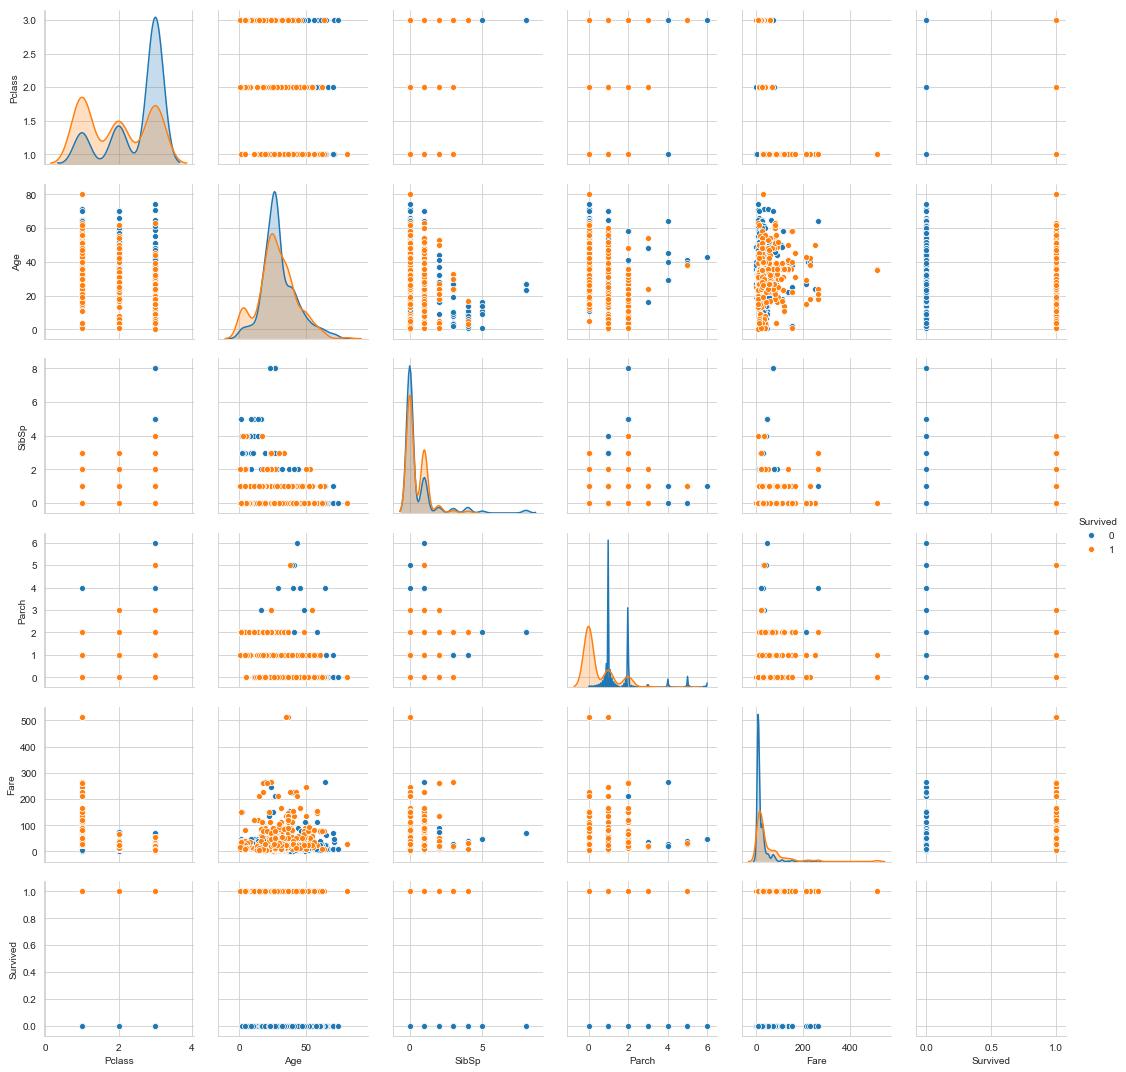

In [23]:
sns.pairplot(data=titanic_df,hue='Survived')

In [24]:
titanic_df[['Pclass','Fare']].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


In [25]:
sex_map={'male':0, 'female':1}
titanic_df['Sex']=titanic_df['Sex'].map(sex_map)
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,3,1,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,3,0,35.0,0,0,8.0500,S,0


In [26]:
new_titanic=pd.concat([titanic_df, pd.get_dummies(titanic_df['Embarked'], prefix='Embarked_')], axis=1)
new_titanic.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Embarked__C,Embarked__Q,Embarked__S
0,3,0,22.0,1,0,7.2500,S,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,1,1,0,0
2,3,1,26.0,0,0,7.9250,S,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,1,0,0,1
4,3,0,35.0,0,0,8.0500,S,0,0,0,1


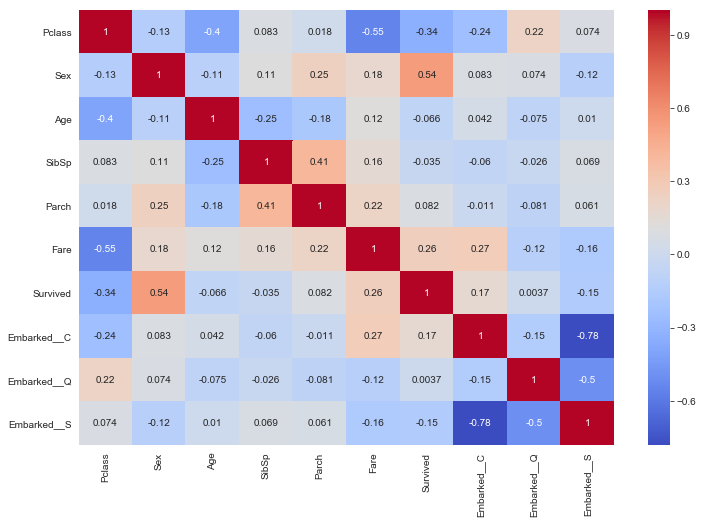

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(new_titanic.corr(), annot=True, cmap='coolwarm')

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

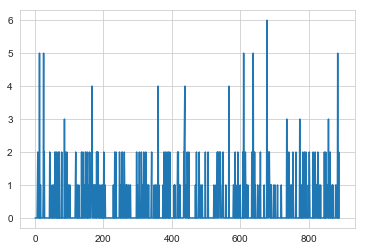

In [28]:
display(new_titanic['Parch'].value_counts())
plt.plot(new_titanic['Parch'])

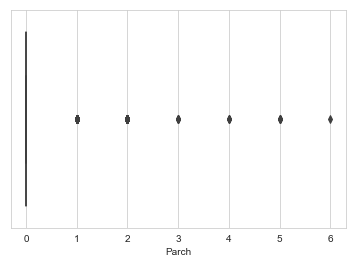

In [36]:
sns.boxplot(x='Parch', hue='Sex', data=new_titanic)

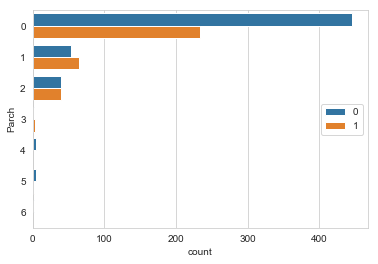

In [37]:
# sns.jointplot(x='Parch', y='Survived', data=new_titanic)
sns.countplot(y='Parch',data=new_titanic, hue='Survived')
plt.legend(loc=0)

In [38]:
new_titanic.drop(['Embarked'], axis=1, inplace=True)
new_titanic=new_titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked__C','Embarked__Q','Embarked__S','Survived']]
new_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Survived
0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1
2,3,1,26.0,0,0,7.9250,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,1
4,3,0,35.0,0,0,8.0500,0,0,1,0


# Logistic Regression



In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [40]:
new_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Survived
0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1
2,3,1,26.0,0,0,7.9250,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,1
4,3,0,35.0,0,0,8.0500,0,0,1,0


** Train and fit a logistic regression model on the training set.**

In [41]:
scaled_titanic=new_titanic.copy()
scaled_titanic=pd.DataFrame(scaler.fit_transform(new_titanic), columns=new_titanic.columns.tolist())
scaled_titanic.head()

C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Survived
0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0
1,0.0,1.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,1.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,1.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,1.0
4,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0


In [42]:
X=new_titanic.iloc[:, :-1]
y=new_titanic.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=101,)

In [44]:
logmodel=LogisticRegression(penalty='l2',C=0.5 )
logmodel

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
logmodel.fit(X,y)

C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
print(classification_report(y_test, logmodel.predict(X_test)))
print(" Accuracy score", accuracy_score(y_test, logmodel.predict(X_test)))
confusion_matrix(y_test, logmodel.predict(X_test))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

   micro avg       0.81      0.81      0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90

 Accuracy score 0.8111111111111111


array([[46,  5],
       [12, 27]], dtype=int64)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [47]:
test_titanic=pd.read_csv('titanic/test.csv')
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
print(test_titanic.shape)

(418, 11)


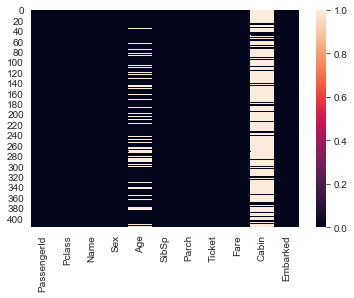

In [49]:
sns.heatmap(test_titanic.isnull())

In [50]:
test_titanic['Age']=test_titanic[['Pclass', 'Sex','Age']].apply(impute_age, axis=1)


In [51]:
test_titanic['Sex']=test_titanic['Sex'].map(sex_map)
test_titanic.drop('Cabin', axis=1, inplace=True)
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [52]:
test_new=pd.concat([test_titanic, pd.get_dummies(test_titanic['Embarked'], prefix='Embarked_')],\
                   axis=1, ignore_index=False)
# print(test_new.shape)
test_new.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked__C,Embarked__Q,Embarked__S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,0,1


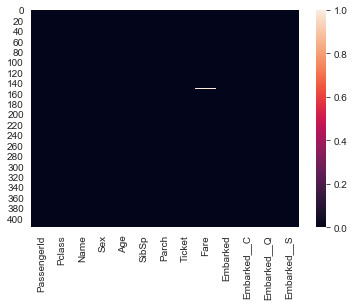

In [53]:
# sns.heatmap(np.nan(test_titanic).sum())
sns.heatmap(test_new.isna())

In [54]:
print(test_new.shape)
print(test_titanic.shape)

(418, 13)
(418, 10)


In [55]:
test_new=test_new[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked__C','Embarked__Q','Embarked__S']]
test_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


In [56]:
test_new[test_new['Fare'].isnull()].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
152,3,0,60.5,0,0,NaN,0,0,1


In [57]:
test_new[test_new['Pclass']==3]['Fare'].mean(skipna=True)

12.459677880184334

In [58]:
#impute fare amount
test_new.loc[test_new['Fare'].isnull(),'Fare']=test_new[test_new['Pclass']==3]['Fare'].mean(skipna=True)

In [59]:
predictions=logmodel.predict(test_new)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
#map the passenger_id with predictions and write_csv
pd.DataFrame( predictions,test_titanic['PassengerId'], columns=[ 'Survived'],).to_csv('titanic/logistic_4.csv')

## Great Job!

## KNearestClassifier-knearestNeighbors

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
k_neighbors=KNeighborsClassifier(n_neighbors=1)
k_neighbors.fit(X_train,y_train)
pred_1=k_neighbors.predict(X_test)
print("k=",1)
print(classification_report(y_test, pred_1))
print(accuracy_score(y_test, pred_1))
confusion_matrix(y_test, pred_1)

k= 1
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        51
           1       0.75      0.62      0.68        39

   micro avg       0.74      0.74      0.74        90
   macro avg       0.75      0.73      0.73        90
weighted avg       0.75      0.74      0.74        90

0.7444444444444445


array([[43,  8],
       [15, 24]], dtype=int64)

In [63]:
error=[]
for i in range(1, 100):
    k_neighbor_i=KNeighborsClassifier(n_neighbors=i)
    k_neighbor_i.fit(X_train, y_train)
    pred_i=k_neighbor_i.predict(X_test)
    error.append(np.mean(y_test!=pred_i))
    

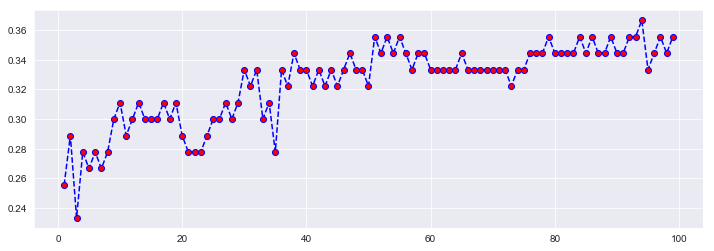

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
plt.plot(range(1,100), error, marker='o', ls='--', markerfacecolor='r', c='b')

In [65]:
k_neighbors_3=KNeighborsClassifier(n_neighbors=3)
k_neighbors_3.fit(X_train,y_train)
pred_3=k_neighbors.predict(X_test)
print("k=",3)
print(classification_report(y_test, pred_3))
print(accuracy_score(y_test, pred_3))
confusion_matrix(y_test, pred_3)

k= 3
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        51
           1       0.75      0.62      0.68        39

   micro avg       0.74      0.74      0.74        90
   macro avg       0.75      0.73      0.73        90
weighted avg       0.75      0.74      0.74        90

0.7444444444444445


array([[43,  8],
       [15, 24]], dtype=int64)

# DECISION TREE


In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=6,presort=True, min_impurity_decrease=0.0,random_state=101 )
# dt_model=DecisionTreeClassifier(max_depth=2)

In [67]:
dt_model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=True, random_state=101, splitter='best')

In [68]:
dt_model.score(X_test, y_test)

0.7666666666666667

In [69]:
dt_pred=dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))
print(accuracy_score(y_test, dt_pred))
confusion_matrix(y_test, dt_pred)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        51
           1       0.80      0.62      0.70        39

   micro avg       0.77      0.77      0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90

0.7666666666666667


array([[45,  6],
       [15, 24]], dtype=int64)

In [70]:
DT_classification=dt_model.predict(test_new)

In [71]:
DT_classification

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
pd.DataFrame( DT_classification,test_titanic['PassengerId'], columns=[ 'Survived'],).to_csv('titanic/dt1.csv')

### Randomforest classifier


In [73]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier(n_estimators=10)

In [74]:
Rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
Rf_model.score(X_test, y_test)

0.9666666666666667

In [76]:
Rf_pred=Rf_model.predict(X_test)
print(classification_report(y_test, Rf_pred))
print(accuracy_score(y_test, Rf_pred))
confusion_matrix(y_test, Rf_pred)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.92      0.96        39

   micro avg       0.97      0.97      0.97        90
   macro avg       0.97      0.96      0.97        90
weighted avg       0.97      0.97      0.97        90

0.9666666666666667


array([[51,  0],
       [ 3, 36]], dtype=int64)

In [77]:
RF_classification=Rf_model.predict(test_new)

In [78]:
RF_classification

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [80]:
pd.DataFrame( RF_classification,test_titanic['PassengerId'], columns=[ 'Survived'],).to_csv('titanic/Random_Forest2.csv')

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7666666666666667

### Support Vector Classifier

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [83]:
svc=SVC()
svc.fit(X_train, y_train)
svc_pred=svc.predict(X_test)
print(classification_report( y_test,svc_pred))
confusion_matrix(y_test,svc_pred)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        51
           1       0.78      0.72      0.75        39

   micro avg       0.79      0.79      0.79        90
   macro avg       0.79      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90



C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[43,  8],
       [11, 28]], dtype=int64)

In [84]:
print(accuracy_score(y_test,svc_pred))

0.7888888888888889


In [85]:
params={'C':[0.1,1,10,100,1000],'gamma':[10,1,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(svc, param_grid=params,verbose=1)
grid.fit(X_train,y_train)

C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [86]:
display(grid.best_estimator_)
display(grid.best_params_)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

{'C': 100, 'gamma': 0.001}

In [87]:
grid_pred=grid.predict(X_test)
print(classification_report( y_test,grid_pred))

print(accuracy_score(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

   micro avg       0.81      0.81      0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90

0.8111111111111111


In [88]:
confusion_matrix(y_test,grid_pred)

array([[46,  5],
       [12, 27]], dtype=int64)

In [89]:
grid_classification=grid.predict(test_new)
grid_classification

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [90]:

pd.DataFrame( grid_classification,test_titanic['PassengerId'], columns=[ 'Survived'],).to_csv('titanic/grid_svc.csv')

### LSTM

In [91]:
from keras.layers import LSTM, Dense, Dropout, Bidirectional,Activation
from keras.callbacks import ModelCheckpoint, Callback
from keras.initializers import he_uniform
from keras.optimizers import  adam,adam
from keras.activations import tanh, relu
from keras.models import Sequential, load_model

Using TensorFlow backend.


In [92]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(801, 9)
(801,)
(90, 9)
(90,)


In [93]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
825,3,0,27.00,0,0,6.9500,0,1,0
8,3,1,27.00,0,2,11.1333,0,0,1
689,1,1,15.00,0,1,211.3375,0,0,1
513,1,1,54.00,1,0,59.4000,1,0,0
729,3,1,25.00,1,0,7.9250,0,0,1
820,1,1,52.00,1,1,93.5000,0,0,1
172,3,1,1.00,1,1,11.1333,0,0,1
834,3,0,18.00,0,0,8.3000,0,0,1
42,3,0,27.00,0,0,7.8958,1,0,0
869,3,0,4.00,1,1,11.1333,0,0,1


In [94]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_xtrain=scaler.fit_transform(X_train)
scaled_xtest=scaler.transform(X_test)
scaled_xtrain

C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 0.        , 0.36123947, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.36123947, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.19815167, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.55150856, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.59228051, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.30687687, ..., 0.        , 0.        ,
        1.        ]])

In [95]:
print(scaled_xtrain.shape)
print(scaled_xtest.shape)

(801, 9)
(90, 9)


In [96]:
x_train1, x_train2=scaled_xtrain.shape
x_test1,x_test2=scaled_xtest.shape
print(x_train1)

801


In [97]:
lstm_xtrain=np.array(scaled_xtrain).reshape(x_train1, 1, x_train2)
lstm_ytrain=np.array(y_train).reshape(x_train1, 1, 1)

lstm_xtest=np.array(scaled_xtest).reshape(x_test1, 1, x_test2)
lstm_ytest=np.array(y_test).reshape(x_test1, 1, 1)


print(lstm_xtrain.shape)
print(lstm_ytrain.shape)
print(lstm_xtest.shape)
print(lstm_ytest.shape)

(801, 1, 9)
(801, 1, 1)
(90, 1, 9)
(90, 1, 1)


In [98]:
test_new.shape

(418, 9)

In [99]:
scaled_test_new=scaler.transform(test_new)
lstm_test_new=np.array(scaled_test_new).reshape(test_new.shape[0],1,test_new.shape[1] )
lstm_test_new.shape

(418, 1, 9)

In [108]:
model=Sequential()
model.add(LSTM(50,kernel_initializer='he_uniform', return_sequences=True))
model.add(Dropout(rate=0.01))
model.add(Activation('relu'))
model.add(LSTM(50,kernel_initializer='he_uniform', return_sequences=True))
model.add(Dropout(rate=0.01))
model.add(Activation('relu'))
model.add(LSTM(50,kernel_initializer='he_uniform', return_sequences=True))
model.add(Dropout(rate=0.01))
model.add(Activation('relu'))

model.add(Dense(30,kernel_initializer='glorot_uniform'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse',metrics=['accuracy'], monitor='val_loss',learning_rate=0.1)

In [101]:
mc=ModelCheckpoint('titanic/best_model-{epoch:03d}_{loss:.2f}_{val_loss:.3f}_{val_acc:.3f}.h5',mode='min', verbose=1,\
                   monitor='val_acc' )

In [102]:
history=model.fit(lstm_xtrain,lstm_ytrain, batch_size=50,shuffle=True, epochs=150, validation_data=(lstm_xtest,lstm_ytest),\
                )

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 801 samples, validate on 90 samples
Epoch 1/150
801/801 [==============================] - 3s 4ms/step - loss: 0.3267 - acc: 0.6217 - val_loss: 0.3044 - val_acc: 0.5667
Epoch 2/150
801/801 [==============================] - 0s 107us/step - loss: 0.2462 - acc: 0.6217 - val_loss: 0.2385 - val_acc: 0.5667
Epoch 3/150
801/801 [==============================] - 0s 111us/step - loss: 0.2172 - acc: 0.6392 - val_loss: 0.2142 - val_acc: 0.6111
Epoch 4/150
801/801 [==============================] - 0s 120us/step - loss: 0.1916 - acc: 0.7266 - val_loss: 0.1860 - val_acc: 0.7444
Epoch 5/150
801/801 [==============================] - 0s 109us/step - loss: 0.1643 - acc: 0.7815 - val_loss: 0.1641 - val_acc: 0.7667
Epoch 6/150
801/801 [==============================] - 0s 114us/step - loss: 0.1447 - acc: 0.7890 - val_loss: 0.1575 - 

801/801 [==============================] - 0s 102us/step - loss: 0.1225 - acc: 0.8327 - val_loss: 0.1356 - val_acc: 0.7889
Epoch 57/150
801/801 [==============================] - 0s 101us/step - loss: 0.1216 - acc: 0.8414 - val_loss: 0.1358 - val_acc: 0.8000
Epoch 58/150
801/801 [==============================] - 0s 107us/step - loss: 0.1231 - acc: 0.8414 - val_loss: 0.1326 - val_acc: 0.8111
Epoch 59/150
801/801 [==============================] - 0s 105us/step - loss: 0.1242 - acc: 0.8390 - val_loss: 0.1357 - val_acc: 0.8111
Epoch 60/150
801/801 [==============================] - 0s 99us/step - loss: 0.1236 - acc: 0.8315 - val_loss: 0.1405 - val_acc: 0.7778
Epoch 61/150
801/801 [==============================] - 0s 105us/step - loss: 0.1229 - acc: 0.8377 - val_loss: 0.1380 - val_acc: 0.8000
Epoch 62/150
801/801 [==============================] - 0s 115us/step - loss: 0.1205 - acc: 0.8365 - val_loss: 0.1366 - val_acc: 0.8000
Epoch 63/150
801/801 [==============================] - 0s 114

801/801 [==============================] - 0s 120us/step - loss: 0.1175 - acc: 0.8390 - val_loss: 0.1227 - val_acc: 0.8556
Epoch 117/150
801/801 [==============================] - 0s 114us/step - loss: 0.1163 - acc: 0.8439 - val_loss: 0.1239 - val_acc: 0.8556
Epoch 118/150
801/801 [==============================] - 0s 120us/step - loss: 0.1175 - acc: 0.8414 - val_loss: 0.1293 - val_acc: 0.8333
Epoch 119/150
801/801 [==============================] - 0s 114us/step - loss: 0.1142 - acc: 0.8414 - val_loss: 0.1274 - val_acc: 0.8333
Epoch 120/150
801/801 [==============================] - 0s 117us/step - loss: 0.1149 - acc: 0.8414 - val_loss: 0.1257 - val_acc: 0.8222
Epoch 121/150
801/801 [==============================] - 0s 117us/step - loss: 0.1277 - acc: 0.8277 - val_loss: 0.1240 - val_acc: 0.8667
Epoch 122/150
801/801 [==============================] - 0s 104us/step - loss: 0.1175 - acc: 0.8489 - val_loss: 0.1263 - val_acc: 0.8333
Epoch 123/150
801/801 [==============================] 

In [103]:
# dir(history.history)
# # 

Text(0.5, 0, 'epoch')

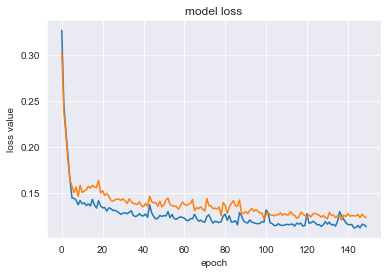

In [104]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('model loss')
plt.ylabel('loss value')
plt.xlabel('epoch')

In [105]:
# model=load_model('titanic/best_model-118_0.12_0.13_0.86')

In [106]:
lstm_pred=model.predict(lstm_test_new)

lstm_pred=pd.DataFrame(lstm_pred.flatten(), index=range(0,418), columns=['classification'])
lstm_pred['classification']=lstm_pred['classification'].apply(lambda x: 0 if x<=0.5 else 1)
lstm_pred.sample(10)

,classification
277,0
175,1
95,0
230,0
345,1
128,0
173,0
299,0
310,0
224,1


In [109]:
lstm_predictions=pd.concat([lstm_pred,test_titanic['PassengerId']],axis=1,ignore_index=True)
lstm_predictions.rename(columns={0:'Survived',1:'PassengerId'},inplace=True)
lstm_predictions.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896


In [110]:
lstm_predictions

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896
5,0,897
6,1,898
7,0,899
8,1,900
9,0,901


In [111]:
lstm_predictions.set_index('PassengerId', inplace=True)
lstm_predictions.to_csv('titanic/lstm_predictions.csv')
lstm_predictions

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [ ]:
from sklearn.ensemble import _gradient_boosting

In [112]:
!pip install xgboost

In [113]:
import xgboost

['Booster',
 'DMatrix',
 'VERSION_FILE',
 'XGBClassifier',
 'XGBModel',
 'XGBRFClassifier',
 'XGBRFRegressor',
 'XGBRanker',
 'XGBRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'callback',
 'compat',
 'core',
 'cv',
 'f',
 'libpath',
 'os',
 'plot_importance',
 'plot_tree',
 'plotting',
 'rabit',
 'sklearn',
 'to_graphviz',
 'train',
 'training']

In [234]:
from xgboost import XGBClassifier
xg_classifier=XGBClassifier(booster='gbtree', learning_rate=0.08, gamma=0.0001, base_score=0.3, verbosity=3,n_estimators=100)

In [235]:
xg_classifier.fit(X_train, y_train)

[16:00:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:00:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:00:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:00:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:00:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:00:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:

XGBClassifier(base_score=0.3, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.0001,
       learning_rate=0.08, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=3)

In [236]:
xg_pred=xg_classifier.predict(X_test)


In [237]:
xg_classifier.score(X_test, y_test)

0.8333333333333334

In [238]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
825,3,0,27.0,0,0,6.9500,0,1,0
8,3,1,27.0,0,2,11.1333,0,0,1
689,1,1,15.0,0,1,211.3375,0,0,1
513,1,1,54.0,1,0,59.4000,1,0,0
729,3,1,25.0,1,0,7.9250,0,0,1


In [239]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
331,1,0,45.5,0,0,28.500,0,0,1
700,1,1,18.0,1,0,227.525,1,0,0
748,1,0,19.0,1,0,53.100,0,0,1
751,3,0,6.0,0,1,12.475,0,0,1
481,2,0,27.0,0,0,0.000,0,0,1


In [240]:
print(classification_report( y_test,xg_pred))
confusion_matrix(y_test,xg_pred)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        51
           1       0.93      0.67      0.78        39

   micro avg       0.83      0.83      0.83        90
   macro avg       0.86      0.81      0.82        90
weighted avg       0.85      0.83      0.83        90



array([[49,  2],
       [13, 26]], dtype=int64)

In [242]:
xg_classification=xg_classifier.predict(test_new)

In [243]:
pd.DataFrame( xg_classification,test_titanic['PassengerId'], columns=[ 'Survived'],).to_csv('titanic/xg_boost.csv')